In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline
plt.rcParams.update({'font.size': 20})

root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'

In [2]:
def print_mem():
    memory_usage = psutil.Process(os.getpid()).memory_info().rss*10**-9
    print('Current memory usage: {:.2f}GB'.format(memory_usage))
print_mem()

Current memory usage: 0.62GB


In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

In [6]:
directory = os.path.join(root_directory,'fly_5','func_0')
brain_path = os.path.join(directory, 'super_voxels', 'brain_green_zscore_flat.npy')
brain_vectorized = np.load(brain_path)

In [8]:
brain_vectorized.shape

(482944, 4731)

In [9]:
from sklearn.feature_extraction.image import grid_to_graph
connectivity = grid_to_graph(77,128,49)

In [10]:
connectivity.shape

(482944, 482944)

In [38]:
clustering_dir = os.path.join(directory, 'super_voxels')

t0 = time.time()
model = AgglomerativeClustering(n_clusters = 200000,
                                memory=clustering_dir,
                                linkage='ward',
                                connectivity=connectivity)
model = model.fit(brain_vectorized)
print(time.time()-t0)

180.8541295528412


In [39]:
brain_clusters = model.labels_.reshape(77,128,49)

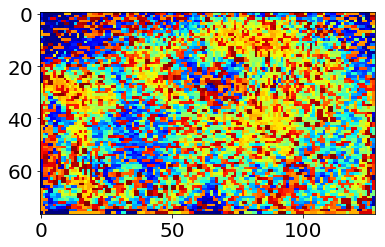

In [40]:
plt.imshow(brain_clusters[:,:,20],cmap='jet')

In [42]:
clustering_dir = os.path.join(directory, 'super_voxels')

brain_cluster_sweep = {}

n_clusters = [200000,100000,50000,20000,10000,5000,1000]

for clusters in n_clusters[::-1]:
    print('working on {} clusters'.format(clusters))
    t0 = time.time()
    model = AgglomerativeClustering(n_clusters = clusters,
                                    memory=clustering_dir,
                                    linkage='ward',
                                    connectivity=connectivity)
    model = model.fit(brain_vectorized)
    
    brain_clusters = model.labels_.reshape(77,128,49)
    brain_cluster_sweep[clusters] = brain_clusters
    
    save_path = os.path.join(clustering_dir, 'ward_cc_{}'.format(n_clusters))
    np.save(save_path, brain_clusters)
    print(time.time()-t0)

working on 1000 clusters
20.217737913131714
working on 5000 clusters
19.0791437625885
working on 10000 clusters
279.51398730278015
working on 20000 clusters
257.55724811553955
working on 50000 clusters
237.84789395332336
working on 100000 clusters
213.69402933120728
working on 200000 clusters
18.1131649017334


In [46]:
brain_cluster_sweep.keys()

dict_keys([1000, 5000, 10000, 20000, 50000, 100000, 200000])

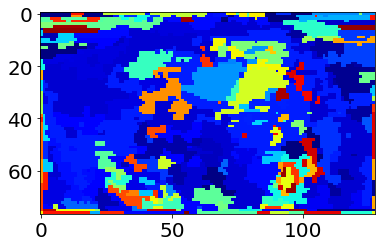

In [101]:
plt.imshow(brain_cluster_sweep[1000][:,:,30],cmap='jet')